# Intro

Juan Nunez-Iglesias  
Victorian Life Sciences Computation Initiative (VLSCI)  
University of Melbourne  

# Quick example: gene expression, without numpy


|        | Cell type A | Cell type B | Cell type C | Cell type D |
|--------|-------------|-------------|-------------|-------------|
| Gene 0 | 100         | 200         | 50          | 400         |
| Gene 1 | 50          | 0           | 0           | 100         |
| Gene 2 | 350         | 100         | 50          | 200         |

In [2]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

Why is this a bad idea?

# Now with NumPy

In [3]:
import numpy as np
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


We are going to:

* Obtain an *RPKM* expression matrix
* Quantile normalize the data

using the awesome power of NumPy

# Inside a numpy ndarray

In [4]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [5]:
print(a.data)

In [6]:
abytes = a.ravel().view(dtype=np.uint8)

In [7]:
print(a)
print(a.ravel())

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]
[100 200  50 400  50   0   0 100 350 100  50 200]


In [8]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [9]:
print(abytes[:24])

[100   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0  50   0
   0   0   0   0   0   0]


### Example: take the transpose of `a`

In [10]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [11]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [12]:
print(a.ravel())

[100 200  50 400  50   0   0 100 350 100  50 200]


In [13]:
print(a.T.ravel())

[100  50 350 200   0 100  50   0  50 400 100 200]


In [14]:
big_3d_image = np.random.rand(250, 250, 250)

In [15]:
print_info(big_3d_image)

number of elements: 15625000
number of dimensions: 3
shape: (250, 250, 250)
data type: float64
strides: (500000, 2000, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [16]:
%%timeit
for i in range(big_3d_image.shape[0]):
    big_3d_image[i, :, :] *= 5

10 loops, best of 3: 18.9 ms per loop


In [17]:
%%timeit
for i in range(big_3d_image.shape[2]):
    big_3d_image[:, :, i] *= 5

1 loops, best of 3: 332 ms per loop


### Example: skipping rows and columns with *slicing*

In [18]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [19]:
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [20]:
print(a[:2])

[[100 200  50 400]
 [ 50   0   0 100]]


In [21]:
print(a[1:])

[[ 50   0   0 100]
 [350 100  50 200]]


In [22]:
print(a[1:2])

[[ 50   0   0 100]]


In [23]:
print(a[::2])

[[100 200  50 400]
 [350 100  50 200]]


In [27]:
np.copy(a)

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [25]:
b = np.array(5)
print_info(b)

number of elements: 1
number of dimensions: 0
shape: ()
data type: int64
strides: ()
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Getting a copy

In [28]:
b = a

In [29]:
print(b)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [30]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

[[  5 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


# Advanced operations: axis-wise evaluation

In [31]:
expr = np.load('expr.npy')

In [32]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


This has the raw read count data. However, each sample gets a different number of reads, so we want to normalize by the *library size*, which is the total number of reads across a column.

The `np.sum` function returns the sum of all the elements of an array. With the `axis` argument, you can take the sum *along the given axis*.

In [33]:
lib_size = np.sum(expr, axis=0)

In [38]:
print(expr.shape)

(20500, 375)


In [39]:
print(lib_size.shape)

(375,)


### Exercise

Generate a 10 x 3 array of random numbers. From each row, pick the number closest to 0.75. Make use of np.abs and np.argmax to find the column j which contains the closest element in each row.

In [37]:
x = np.random.rand(10, 3)
idx = np.argmin(np.abs(x - 0.75), axis=1)
print(idx)
x[np.arange(10), idx]

[2 0 1 0 1 1 1 1 1 2]


array([ 0.54640019,  0.67174627,  0.70893317,  0.82966633,  0.72207392,
        0.80401451,  0.62062714,  0.59359382,  0.67788231,  0.69896404])

# Advanced operations: broadcasting

In order to normalize every column by its corresponding library size, we have to *align* the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use `np.newaxis` to match the dimensions.

In [40]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


However, NumPy will automatically prepend singleton dimensions until the array shapes match or there is an error:

In [41]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [42]:
expr_lib = expr / lib_size

We also multiply by $10^6$ in order to keep the numbers on a readable scale (reads per million reads).

In [43]:
expr_lib *= 1e6

Finally, longer genes are more likely to produce reads. So we normalize by the gene length (in kb) to produce a measure of expression called Reads Per Kilobase per Million reads (RPKM).

In [44]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


### Exercise: broadcast `expr_lib` and `gene_len` together to produce RPKM

In [45]:
print(expr_lib.shape)

(20500, 375)


In [46]:
rpkm = expr_lib / np.reshape(gene_len, (20500, 1)) * 1e3 # FIX THIS

In [47]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    plt.figure()
    for density in density_per_col:
        plt.plot(x, density(x), *args, **kwargs)
    plt.xlabel('log-counts')
    plt.ylabel('frequency')
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()


In [48]:
%matplotlib inline

In [49]:
plt.style.use('ggplot')

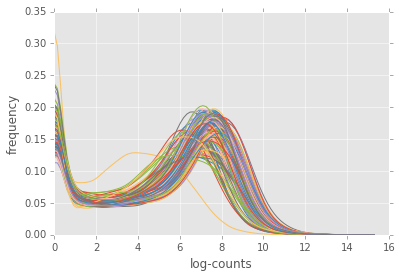

In [50]:
plot_col_density(np.log(expr+1))

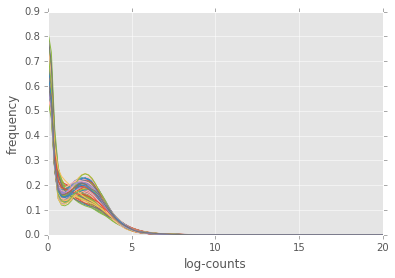

In [52]:
plot_col_density(np.log(rpkm + 1), xlim=(0, 20))

### Exercise: 3D broadcasting

Below, produce the array containing the sum of every element in `x` with every element in `y`

In [53]:
x = np.random.rand(3, 5)
y = np.random.randint(10, size=8)
z = x[..., np.newaxis] + y # FIX THIS

In [59]:
print(x[:, :, np.newaxis])


[[[ 0.11512127]
  [ 0.3865219 ]
  [ 0.41885331]
  [ 0.98653796]
  [ 0.55749656]]

 [[ 0.84192559]
  [ 0.16029533]
  [ 0.8940728 ]
  [ 0.08967054]
  [ 0.73473444]]

 [[ 0.13776475]
  [ 0.71445441]
  [ 0.48971083]
  [ 0.81450858]
  [ 0.43305358]]]


### Exercise: explicit broadcasting and stride tricks

Use `np.broadcast_arrays` to get the same-shape arrays that numpy adds together. Then use `print_info` on the output. Notice anything weird?

In [60]:
xx, yy = np.broadcast_arrays(x[..., np.newaxis], y)

In [63]:
print(xx.shape)
print_info(yy)

(3, 5, 8)
number of elements: 120
number of dimensions: 3
shape: (3, 5, 8)
data type: int64
strides: (0, 0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


## Stride tricks

By manipulating the shape and strides of an array, we can produce a "virtual" array much bigger than its memory usage:

In [64]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [65]:
repeat(np.random.rand(5), 4)

array([[ 0.61980715,  0.35812349,  0.31169966,  0.12142768,  0.94522301],
       [ 0.61980715,  0.35812349,  0.31169966,  0.12142768,  0.94522301],
       [ 0.61980715,  0.35812349,  0.31169966,  0.12142768,  0.94522301],
       [ 0.61980715,  0.35812349,  0.31169966,  0.12142768,  0.94522301]])

### Exercise: `np.lib.stride_tricks.as_strided`

Use `as_strided` to produce a sliding-window view of a 1D array.

In [67]:
def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - size + 1, size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    n = arr.shape[0]
    s = arr.strides[0]
    arr_slide = np.lib.stride_tricks.as_strided(arr,
                                                shape=(n - size + 1, size),
                                                strides=(s, s))
    return arr_slide

In [68]:
# test your code here
sliding_window(np.arange(8), 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

# Fancy indexing

You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [69]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector])

[[0 0 0 2]
 [2 0 0 1]
 [1 2 1 0]]
[[ 0  0  0 99]
 [99  0  0  5]
 [ 5 99  5  0]]


### Exercise: quantile normalization

Quantile Normalization(https://en.wikipedia.org/wiki/Quantile_normalization) is a method to align distributions. Implement it using NumPy axis-wise operations and fancy indexing.

*Hint: look for documentation for `scipy.stats.mstats.rankdata`, `np.sort`, and `np.argsort`.*

In [71]:
np.round(np.random.rand(5)).astype(int)

array([0, 0, 1, 0, 1])

In [72]:
from scipy.stats import mstats

def qnorm(x):
    """Quantile normalize an input matrix.
    
    Parameters
    ----------
    x : 2D array of float, shape (M, N)
        The input data, with each column being a
        distribution to normalize.
        
    Returns
    -------
    xn : 2D array of float, shape (M, N)
        The normalized data.
    """
    quantiles = np.mean(np.sort(x, axis=0), axis=1)
    ranks = mstats.rankdata(x, axis=0).astype(int) - 1
    # ranks = np.argsort(np.argsort(x, axis=0), axis=0)
    xn = quantiles[ranks]
    return xn

In [73]:
logexpr = np.log(expr + 1)
logrpkm = np.log(rpkm + 1)

In [74]:
logexprn = qnorm(logexpr)

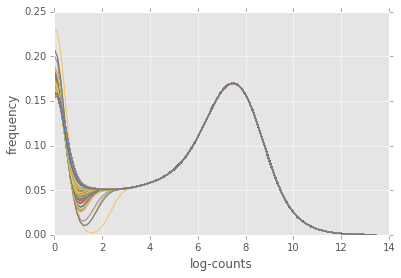

In [75]:
plot_col_density(logexprn)

In [ ]:
plot_col_density(logrpkmn, xlim=(0, 20))

## Advanced exercise Jack's dilemma

(If time permits.)

```email
Date: Wed, 16 Jul 2008 16:45:37 -0500
From: Jack Cook
To: <numpy-discussion@scipy.org>
Subject: Numpy Advanced Indexing Question
```

Greetings,

I have an I,J,K 3D volume of amplitude values at regularly sampled
time intervals. I have an I,J 2D slice which contains a time (K)
value at each I, J location. What I would like to do is extract a
subvolume at a constant +/- K window around the slice. Is there an
easy way to do this using advanced indexing or some other method?
Thanks in advanced for your help.

-- Jack

In [ ]:
# "data"

ni, nj, nk = (10, 15, 20)
amplitude = np.random.rand(ni, nj, nk)
horizon = np.random.randint(5, 15, size=(ni, nj))

## Even more advanced: NumPy Array Interface

An author of a foreign package (included with the exercizes as
``problems/mutable_str.py``) provides a string class that
allocates its own memory:

```ipython
In [1]: from mutable_str import MutableString
In [2]: s = MutableString('abcde')
In [3]: print s
abcde
```

You'd like to view these mutable (*mutable* means the ability to modify in place)
strings as ndarrays, in order to manipulate the underlying memory.

Add an __array_interface__ dictionary attribute to s, then convert s to an
ndarray. Numerically add "2" to the array (use the in-place operator ``+=``).

Then print the original string to ensure that its value was modified.

> **Hint:** Documentation for NumPy's ``__array_interface__``
  may be found [in the online docs](http://docs.scipy.org/doc/numpy/reference/arrays.interface.html).

Here's a skeleton outline:

In [ ]:
import numpy as np
from mutable_str import MutableString

s = MutableString('abcde')

# --- EDIT THIS SECTION ---

# Create an array interface to this foreign object
s.__array_interface__ = {'data' : (XXX, False), # (ptr, is read_only?)
                         'shape' : XXX,
                         'typestr' : '|u1', # typecode unsigned character
                         }

# --- EDIT THIS SECTION ---

print 'String before converting to array:', s
sa = np.asarray(s)

print 'String after converting to array:', sa

sa += 2
print 'String after adding "2" to array:', s